## IA340 Mini Project
Ryan Eller

## Project Title: Crime Statistics in Los Angeles from 2020-2024

## Question: How has crime changed in the city of Los Angeles from 2020-2024?

## Information
- Source: https://catalog.data.gov/dataset/crime-data-from-2020-to-present
- Description: Crime Statistics in Los Angeles from 2020-2024
- Time Period: 2020-2024
- Reason for Choice: I am minoring in Criminal Justice, and I am interested in Law Enforcement.

## Importing the Dataset
- I used pandas to import my CSV file. Then, I displayed the top 5 rows in the dataset.

In [1]:
import pandas as pd

df = pd.read_csv('s3://ia340-2025-fall-12112003/Crime_Data_from_2020_to_Present.csv')
df.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:298: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


## Cleaning the Dataset
- To clean my data, I asked ChatGPT to get me started. I first used info and describe to get more details about my dataset. Then, I droped missing values and removed duplicates in the dataset, and we can see that some were dropped due to missing values.

In [2]:
df.info()
df.describe()

df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

df = df.dropna(subset=['DATE OCC', 'Crm Cd Desc'])

df['Year'] = df['DATE OCC'].dt.year

df = df[df['Year'].between(2020, 2024)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

/tmp/ipykernel_29064/3634052136.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')


## Process / Aggregate
- For this section of the code, I asked ChatGPT to help me create a new variable. This variable I decided to create is crimes per year, to see how crime has changed from 2020-2024. I used groupby to do this.

In [3]:
crimes_per_year = df.groupby('Year').size().reset_index(name='Crime Count')

top_crime_types = (
    df.groupby(['Year', 'Crm Cd Desc'])
    .size()
    .reset_index(name='Count')
)

## Query
- For the Query, I decided to apply the filter of 'top crime areas' in Los Angeles. This allows us to see where most of these crimes are taking place. In the dataframe, we can see the crime count for each area.

In [4]:
import pandas as pd

crimes_2024 = df[df['Year'] == 2024]
print("Crimes in 2024:")
display(crimes_2024.head(10))

top_areas_2024 = (
    crimes_2024.groupby('AREA NAME')
    .size()
    .reset_index(name='Crime Count')
    .sort_values(by='Crime Count', ascending=False)
    .head(5)
)
print("Top 5 LAPD Areas by Total Crimes (2024):")
display(top_areas_2024)

Crimes in 2024:


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year
877327,242108414,04/25/2024 12:00:00 AM,2024-04-25,1600,21,Topanga,2146,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,Adult Other,420.0,998.0,NaN,NaN,21400 SHERMAN WY,NaN,34.2010,-118.5977,2024
877328,240604934,01/21/2024 12:00:00 AM,2024-01-21,1510,6,Hollywood,668,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,1300 N WESTERN AV,NaN,34.0944,-118.3125,2024
877329,241110315,08/29/2024 12:00:00 AM,2024-08-28,1500,11,Northeast,1123,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,Invest Cont,420.0,NaN,NaN,NaN,3600 BRUNSWICK AV,NaN,34.1187,-118.2604,2024
877330,242107187,03/22/2024 12:00:00 AM,2024-03-22,1815,21,Topanga,2145,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,22000 GILMORE ST,NaN,34.1876,-118.6070,2024
877331,241010884,09/06/2024 12:00:00 AM,2024-09-05,1800,10,West Valley,1027,1,330,BURGLARY FROM VEHICLE,...,Invest Cont,330.0,NaN,NaN,NaN,6800 LOUISE AV,NaN,34.1939,-118.5098,2024
877332,240607797,03/25/2024 12:00:00 AM,2024-03-25,1422,6,Hollywood,629,2,625,OTHER ASSAULT,...,Adult Other,625.0,NaN,NaN,NaN,1900 N VAN NESS AV,NaN,34.1053,-118.3159,2024
877333,242113737,12/05/2024 12:00:00 AM,2024-12-03,1800,21,Topanga,2156,1,330,BURGLARY FROM VEHICLE,...,Invest Cont,330.0,NaN,NaN,NaN,21800 VICTORY BL,NaN,34.1874,-118.6035,2024
877334,241408080,04/01/2024 12:00:00 AM,2024-04-01,1920,14,Pacific,1432,1,310,BURGLARY,...,Adult Arrest,310.0,998.0,NaN,NaN,800 VENICE BL,NaN,33.9939,-118.4533,2024
877335,240316919,12/10/2024 12:00:00 AM,2024-12-08,136,3,Southwest,328,2,888,TRESPASSING,...,Invest Cont,888.0,NaN,NaN,NaN,700 W ADAMS BL,NaN,34.0292,-118.2782,2024
877336,241412150,08/07/2024 12:00:00 AM,2024-08-06,2200,14,Pacific,1469,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,6200 ACACIA ST,NaN,33.9819,-118.3641,2024


Top 5 LAPD Areas by Total Crimes (2024):


,AREA NAME,Crime Count
1,Central,10212
15,Southwest,8307
12,Pacific,8162
8,N Hollywood,7248
0,77th Street,6775


## Visualization #1 - Total Crimes vs Violent Crimes
- This Chart shows a comparison between Violent Crimes and Total Crimes. The reason this was selected is to see how bad violent crime is in the city of Los Angeles, compared to other crimes in the dataset. Violent Crime outweighs crimes of different categories, as we can see from the chart.

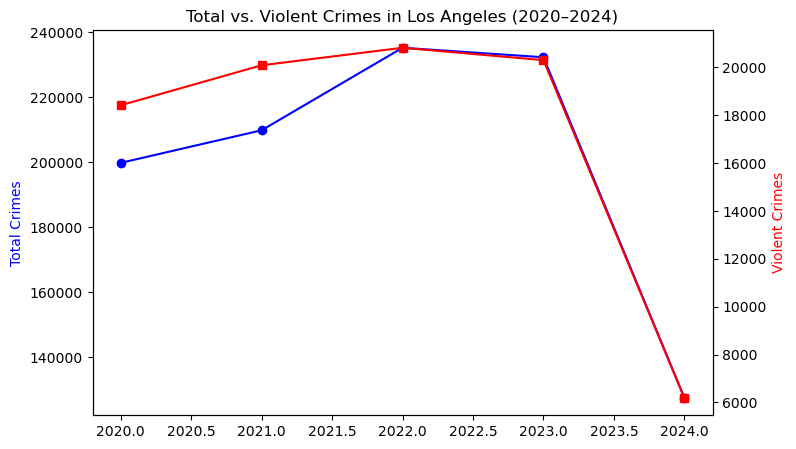

In [5]:
import matplotlib.pyplot as plt

# Total crimes per year
crimes_per_year = df.groupby('Year').size().reset_index(name='Total Crimes')

# Violent crimes per year
violent_types = ['ROBBERY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'HOMICIDE']
violent_per_year = df[df['Crm Cd Desc'].isin(violent_types)].groupby('Year').size().reset_index(name='Violent Crimes')

merged = pd.merge(crimes_per_year, violent_per_year, on='Year', how='left')

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(merged['Year'], merged['Total Crimes'], color='blue', marker='o', label='Total Crimes')
ax1.set_ylabel('Total Crimes', color='blue')

ax2 = ax1.twinx()
ax2.plot(merged['Year'], merged['Violent Crimes'], color='red', marker='s', label='Violent Crimes')
ax2.set_ylabel('Violent Crimes', color='red')

plt.title('Total vs. Violent Crimes in Los Angeles (2020–2024)')
plt.show()

## Visualization #2 - Top 5 Crimes in Los Angeles (2020 - 2024)
- This chart shows the difference in different types of crime from 2020-2024. As we can see, stolen vehicles leads the crime rates across the board. Vandalism is also in the top 5, but is the lowest in the category.

In [ ]:
import matplotlib.pyplot as plt

top5 = top_crime_types[top_crime_types['Crm Cd Desc'].isin(
    top_crime_types.groupby('Crm Cd Desc')['Count'].sum().nlargest(5).index
)]

plt.figure(figsize=(10,6))
for crime in top5['Crm Cd Desc'].unique():
    subset = top5[top5['Crm Cd Desc'] == crime]
    plt.plot(subset['Year'], subset['Count'], marker='o', label=crime)

plt.title('Top 5 Crime Types in Los Angeles (2020–2024)')
plt.xlabel('Year')
plt.ylabel('Reported Incidents')
plt.legend()
plt.show()